# Which team has made the most progress and in what season? What statistics followed?
### Things to explore:
Create a feature containing progress of every team year by year based on it's playoffs performances. Then, select the most improved and analyse their stats (other features)

Data source:
https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('databases/cbb.csv', header=None, skiprows=1)

header = pd.read_csv('databases/cbb.csv', nrows=1, header=None).iloc[0].tolist()
df.columns = header

df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


## Filtering data for better results

Excluding teams that have participated in less than ten seasons in total - for example, due to fresh promotion to the league, which would be unfair and the set of teams would not be equalized.

In [3]:
df_grouped = df.groupby('TEAM')['YEAR'].size()

teams_all_years = df_grouped[df_grouped == 10]
df_all_years = df[df['TEAM'].isin(teams_all_years.index)] #jakieś .isnot?

print(f"Dataset before excluding teams: {df.shape}")
print(f"Dataset after excluding teams: {df_all_years.shape}")

df_excluded_teams = df[~df['TEAM'].isin(teams_all_years.index)]
df_excluded_teams['TEAM'].unique()

Dataset before excluding teams: (3523, 24)
Dataset after excluding teams: (3330, 24)


array(['UMass Lowell', 'North Alabama', 'Brown', 'Columbia', 'Cornell',
       'Dartmouth', 'Penn', 'Princeton', 'Yale', 'Harvard',
       'Bethune Cookman', 'Maryland Eastern Shore', 'Savannah St.',
       'Arkansas Little Rock', 'Little Rock', 'Abilene Christian',
       'Houston Baptist', 'Incarnate Word', 'IPFW', 'Fort Wayne',
       'Grand Canyon', 'Cal Baptist', 'UC San Diego', 'Dixie St.',
       'Merrimack', 'Tarleton St.', 'Bellarmine', 'Utah Tech',
       'St. Thomas', 'Houston Christian', 'Lindenwood',
       'Texas A&M Commerce', 'Stonehill', 'Southern Indiana', 'Queens'],
      dtype=object)

## Mapping the post-season results to representation in numbers and making them usable on a heat map
Each significant round represent number from 1 do 7, when higher = better results and lower = worse. 0 means no playoffs appearance and 7 means secured championship

In [4]:
df_all_years = df_all_years.sort_values(by='YEAR').reset_index(drop=True)

In [5]:
postseason_mapping = {"R68": 1, "R64": 1, "R32": 2, "S16": 3, "E8": 4, "F4": 5, "2ND": 6, "Champions": 7, "No Playoffs": 0}
df_all_years['POSTSEASON'] = df_all_years['POSTSEASON'].fillna("No Playoffs")
df_all_years['POSTSEASON_MAP'] = df_all_years['POSTSEASON'].map(postseason_mapping)

df_all_years[df_all_years['YEAR']==2018].sample(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASON_MAP
1676,Rutgers,B10,33,15,98.1,95.0,0.5890,43.6,48.0,17.2,...,43.4,47.6,29.6,32.5,67.2,-6.8,No Playoffs,NaN,2018,0
1830,North Carolina Central,MEAC,32,19,95.0,110.3,0.1522,50.4,48.5,20.8,...,51.3,48.1,32.3,32.8,66.4,-12.0,R68,16.0,2018,1
1856,Western Carolina,SC,30,12,95.0,108.1,0.1838,46.8,54.4,21.7,...,45.3,54.3,33.0,36.3,70.8,-11.7,No Playoffs,NaN,2018,0
1881,Holy Cross,Pat,31,12,97.7,107.2,0.2569,52.6,51.0,19.1,...,55.1,49.4,32.6,35.4,64.0,-15.0,No Playoffs,NaN,2018,0
1761,Rhode Island,A10,34,26,109.7,97.3,0.7988,51.1,50.4,15.3,...,50.4,50.6,35.2,33.2,69.6,1.6,R32,7.0,2018,2
1980,Hofstra,CAA,30,19,110.0,109.4,0.5169,53.2,54.2,15.6,...,51.6,54.3,37.3,36.0,70.0,-6.1,No Playoffs,NaN,2018,0
1974,Utah St.,MWC,33,17,106.1,103.8,0.5631,53.2,51.9,18.8,...,52.5,50.7,36.0,36.0,68.0,-8.0,No Playoffs,NaN,2018,0
1945,Fairfield,MAAC,33,17,101.0,105.6,0.3743,51.4,52.5,17.4,...,51.8,49.0,33.9,39.3,71.6,-10.5,No Playoffs,NaN,2018,0
1855,Wofford,SC,31,21,108.0,107.8,0.5047,55.2,53.3,18.2,...,50.9,52.4,40.2,36.4,67.1,-5.9,No Playoffs,NaN,2018,0
1927,UAB,CUSA,31,20,108.0,102.5,0.6448,54.7,50.6,19.0,...,55.9,49.1,34.8,35.0,68.8,-6.1,No Playoffs,NaN,2018,0


## Creating PROGRESS feature

**team_list** containing unique teams' names required in future function. Also creating a copy of the main dataframe **df_all_years**, which will store new **PROGRESS** feature

In [6]:
team_list = df_all_years['TEAM'].unique().tolist()

In [7]:
df_all_years_progress = df_all_years.copy(deep=False)
df_all_years_progress.drop(df_all_years_progress.index, inplace=True)
df_all_years_progress['PROGRESS'] = np.nan
display('main dataframe - df_all_years:',df_all_years)
display('copy of df_all_years - df_all_years_progress:',df_all_years_progress)

'main dataframe - df_all_years:'

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASON_MAP
0,Drexel,CAA,31,13,100.1,100.1,0.5003,46.7,48.7,18.9,...,44.9,47.5,33.5,34.2,61.9,-11.9,No Playoffs,NaN,2013,0
1,Florida A&M,MEAC,29,6,88.6,106.5,0.1078,43.0,50.5,22.5,...,41.9,49.3,30.3,35.4,69.6,-18.4,No Playoffs,NaN,2013,0
2,Howard,MEAC,29,6,81.2,101.1,0.0750,39.2,47.3,23.9,...,39.9,45.8,24.9,33.3,62.4,-17.7,No Playoffs,NaN,2013,0
3,Fordham,A10,30,6,98.6,105.7,0.3112,45.0,51.1,22.9,...,44.2,50.0,31.3,35.6,68.8,-13.2,No Playoffs,NaN,2013,0
4,Milwaukee,Horz,30,6,93.7,106.5,0.1871,44.6,50.5,21.5,...,43.5,51.1,30.8,32.7,65.9,-17.4,No Playoffs,NaN,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,Charleston Southern,BSth,29,10,103.7,115.2,0.2300,50.3,54.3,18.1,...,49.7,54.3,34.1,36.2,65.5,-16.1,No Playoffs,NaN,2023,0
3326,Georgia St.,SB,28,10,97.1,107.4,0.2376,45.6,50.7,19.5,...,46.5,48.6,29.0,36.5,66.8,-15.7,No Playoffs,NaN,2023,0
3327,Loyola Chicago,A10,31,10,101.7,106.3,0.3745,52.9,51.6,22.1,...,54.8,51.7,33.4,34.4,66.0,-13.9,No Playoffs,NaN,2023,0
3328,Canisius,MAAC,29,10,101.1,107.4,0.3348,48.6,52.8,17.5,...,47.4,52.0,33.6,36.4,67.5,-15.0,No Playoffs,NaN,2023,0


'copy of df_all_years - df_all_years_progress:'

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASON_MAP,PROGRESS


**add_row** function which adds a row containing team's progress to freshly created **df_all_years_progress** (copy of **df_all_years**)

In [8]:
def add_row(year, team, progress, df_all_years_progress):
    row = df_all_years.loc[(df_all_years['YEAR'] == year) & (df_all_years['TEAM'] == team)].copy()
    row['PROGRESS'] = progress
    
    return pd.concat([df_all_years_progress, row], ignore_index=True)

Iterating over each team in **team_list** and checking its progresss comparing previous and present year. Then, calling **add_row** function where **PROGRESS** is added to other features and saved to **df_all_years_progress**

In [9]:
for team in team_list:
    df_team = df_all_years[df_all_years['TEAM'] == team]
    for year in df_team['YEAR'].iloc[1:]:
        if year == 2021:
            progress = (df_team.loc[df_team['YEAR'] == year, 'POSTSEASON_MAP'].iloc[0]) - (df_team.loc[df_team['YEAR'] == year-2, 'POSTSEASON_MAP'].iloc[0])
        else:
            progress = (df_team.loc[df_team['YEAR'] == year, 'POSTSEASON_MAP'].iloc[0]) - (df_team.loc[df_team['YEAR'] == year-1, 'POSTSEASON_MAP'].iloc[0])
        df_all_years_progress = add_row(year, team, progress, df_all_years_progress)

## Top 5 teams sorted by their progress
The highest is 7, meaning from **no-playoffs** straight to **championship**. Then four positions of 6-progress and the last one with score of 5: truly, the progress of 5 was more common and lot more teams achieved that, so the most **interesting positions were top 5**

In [10]:
df_top_progress = df_all_years_progress.sort_values(by='PROGRESS', ascending=False).iloc[:6,:].reset_index(drop=True)
df_top_progress

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASON_MAP,PROGRESS
0,Connecticut,Amer,40,32,112.5,91.3,0.9171,51.5,44.6,17.3,...,42.2,38.7,33.0,64.8,4.7,Champions,7.0,2014,7,7.0
1,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014,6,6.0
2,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019,7,6.0
3,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015,7,6.0
4,Connecticut,BE,39,31,121.5,91.2,0.9643,53.9,44.4,18.9,...,44.4,36.3,29.7,66.7,5.0,Champions,4.0,2023,7,6.0
5,San Diego St.,MWC,38,32,110.8,89.5,0.9205,49.3,46.5,17.3,...,49.3,34.0,28.3,65.7,5.7,2ND,5.0,2023,6,5.0


## Visualizing which stats followed Connecticut's biggest among all teams progress in 2014 in comparison do 2013

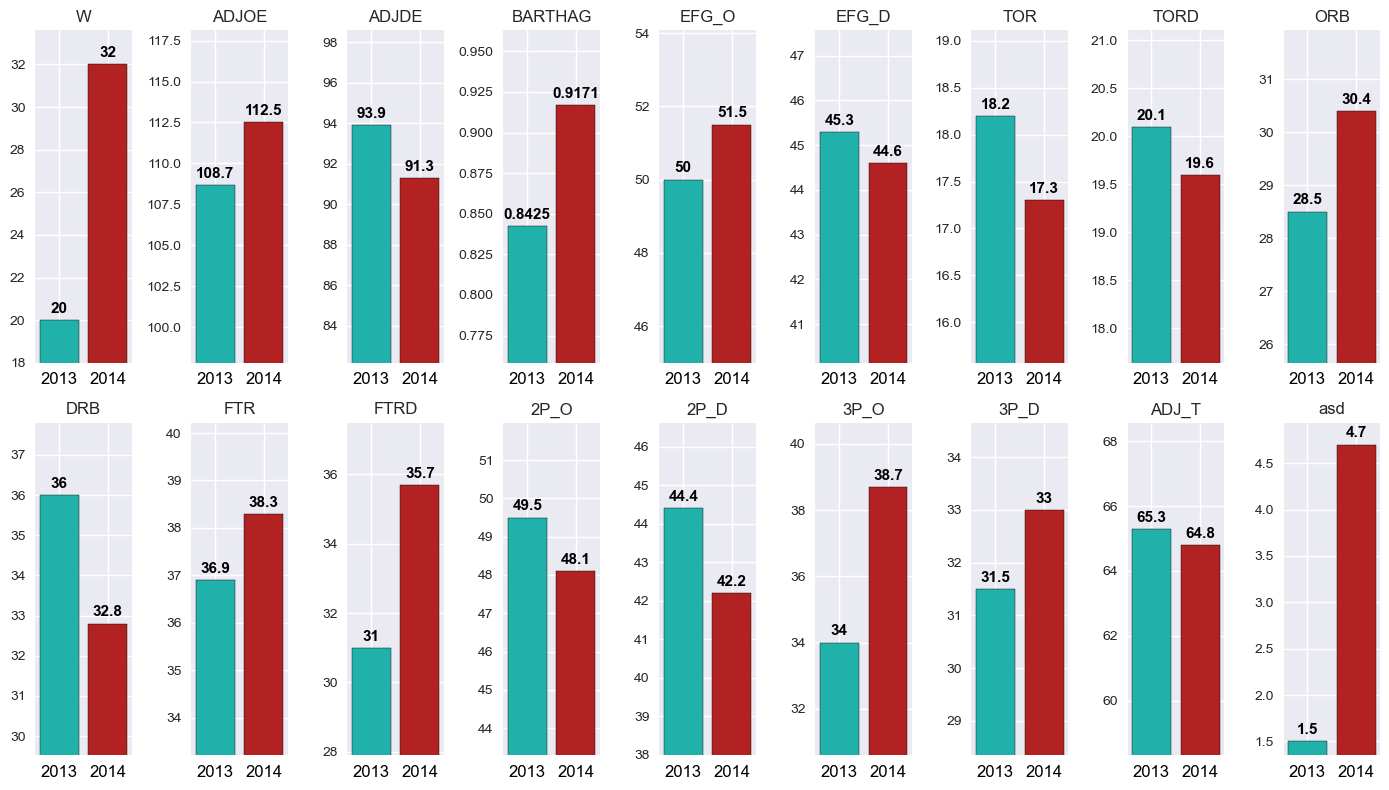

In [27]:
plt.style.use('seaborn-v0_8')

columns_list = df_all_years_progress.columns.tolist()

fig, ax = plt.subplots(2, 9, figsize=(14, 8))
for i, col in enumerate(columns_list[3:21]):
    axis = ax.flat[i]

    team_data = df_all_years[
    ((df_all_years['YEAR'] == 2014) | (df_all_years['YEAR'] == 2013)) & 
    (df_all_years['TEAM'] == 'Connecticut')]

    bars = axis.bar(
        team_data['YEAR'],
        team_data[col],
        color=['lightseagreen','firebrick'],
        edgecolor='black'
    )
    axis.set_title(col)
    axis.bar_label(bars, padding=3, fontsize=11, fontweight='bold', color='black')

    axis.set_ylim([team_data[col].min()-(team_data[col].min()*0.1), team_data[col].max()+(team_data[col].max()*0.05)])

    axis.set_xticks([2013, 2014])
    axis.set_xticklabels(["2013", "2014"], fontsize=12, color='black')
plt.tight_layout()
plt.show()

## Visualizing which stats followed Virgnia's progress (with score 6) in 2019 in comparison do 2018

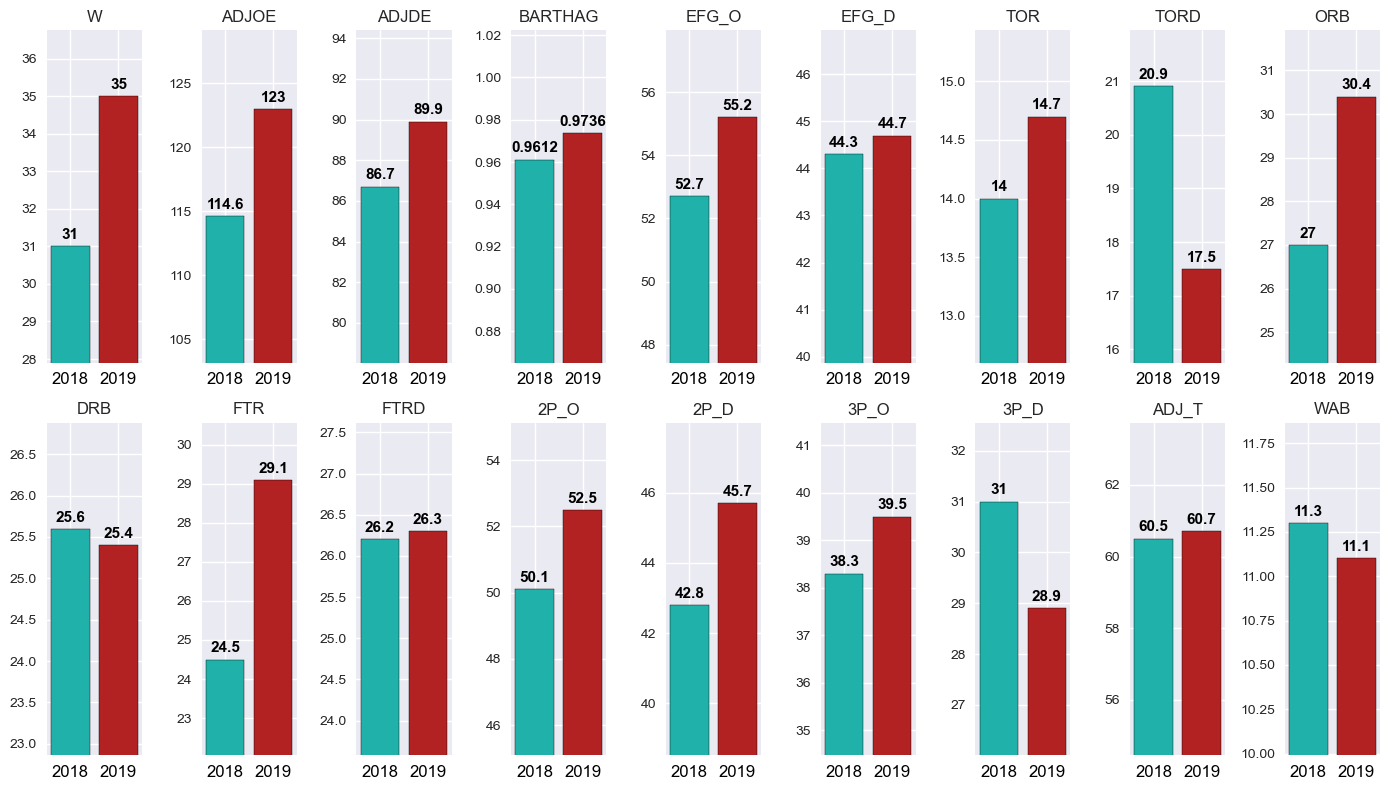

In [25]:
plt.style.use('seaborn-v0_8')

columns_list = df_all_years_progress.columns.tolist()

fig, ax = plt.subplots(2, 9, figsize=(14, 8))
for i, col in enumerate(columns_list[3:21]):
    axis = ax.flat[i]

    team_data = df_all_years[
    ((df_all_years['YEAR'] == 2019) | (df_all_years['YEAR'] == 2018)) & 
    (df_all_years['TEAM'] == 'Virginia')]

    bars = axis.bar(
        team_data['YEAR'],
        team_data[col],
        color=['lightseagreen','firebrick'],
        edgecolor='black'
    )
    axis.set_title(col)
    axis.bar_label(bars, padding=3, fontsize=11, fontweight='bold', color='black')

    axis.set_ylim([team_data[col].min()-(team_data[col].min()*0.1), team_data[col].max()+(team_data[col].max()*0.05)])

    axis.set_xticks([2018, 2019])
    axis.set_xticklabels(["2018", "2019"], fontsize=12, color='black')
    
plt.tight_layout()
plt.show()